In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv("cancer.csv")

In [3]:
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [4]:
# 0= male, 1= female
#genetic risk (0=low, 1=medium, 2= high)

In [5]:
df.info()
# veri setimiz non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [6]:
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

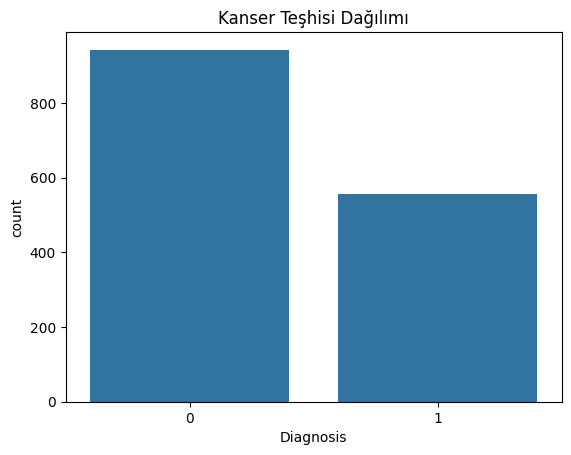

In [8]:
sns.countplot(data=df, x="Diagnosis")
plt.title("Kanser Teşhisi Dağılımı")
plt.show()

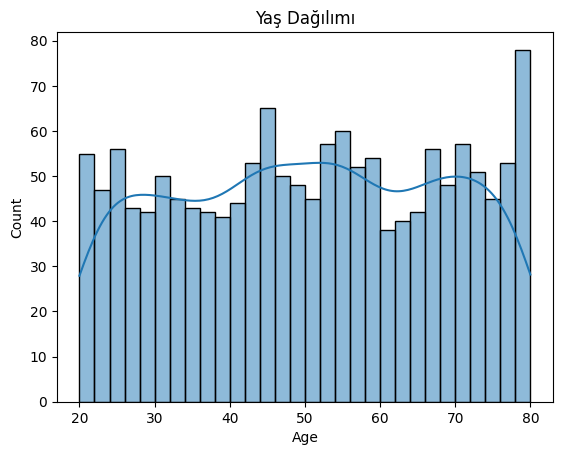

In [9]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Yaş Dağılımı")
plt.show()

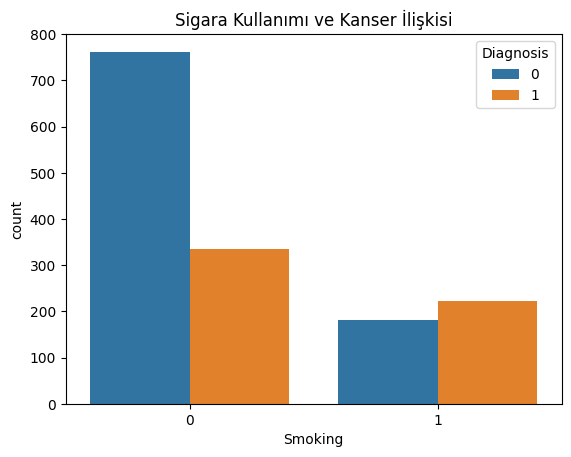

In [10]:
# sigara kullanımı ile kanser riski ilişkisi
sns.countplot(data=df, x="Smoking", hue="Diagnosis")
plt.title("Sigara Kullanımı ve Kanser İlişkisi")
plt.show()

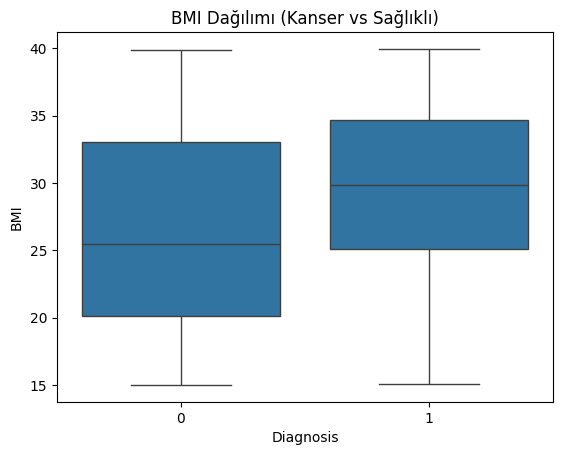

In [11]:
sns.boxplot(data=df, x="Diagnosis", y="BMI")
plt.title("BMI Dağılımı (Kanser vs Sağlıklı)")
plt.show()

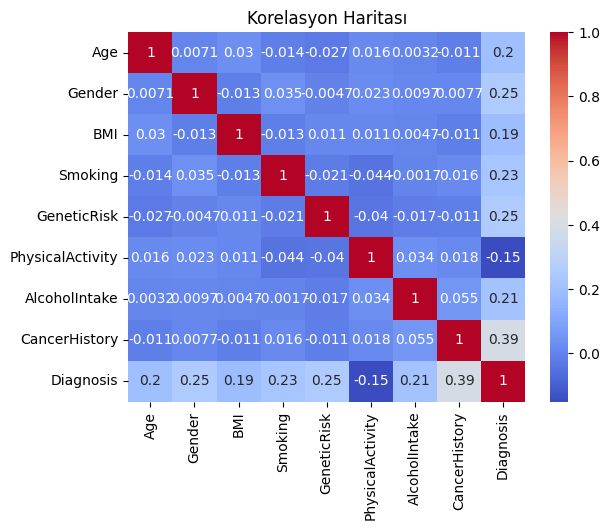

In [12]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasyon Haritası")
plt.show()

kanser riskinin en çok aile geçmişinde olup olmaması olduğunu görüyoruz. 

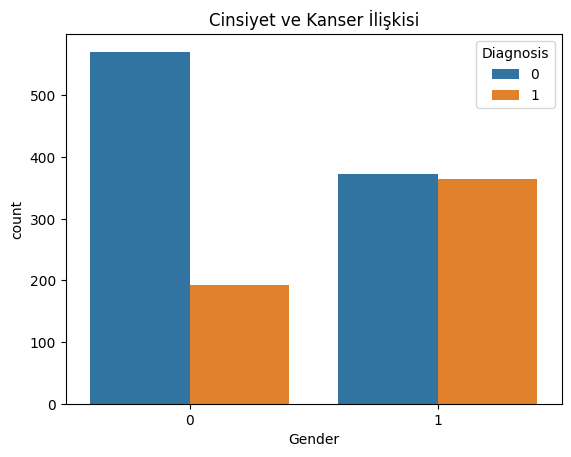

In [13]:
sns.countplot(data=df, x="Gender", hue="Diagnosis")
plt.title("Cinsiyet ve Kanser İlişkisi")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [15]:
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = model.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       184
           1       0.94      0.88      0.91       116

    accuracy                           0.93       300
   macro avg       0.93      0.92      0.93       300
weighted avg       0.93      0.93      0.93       300



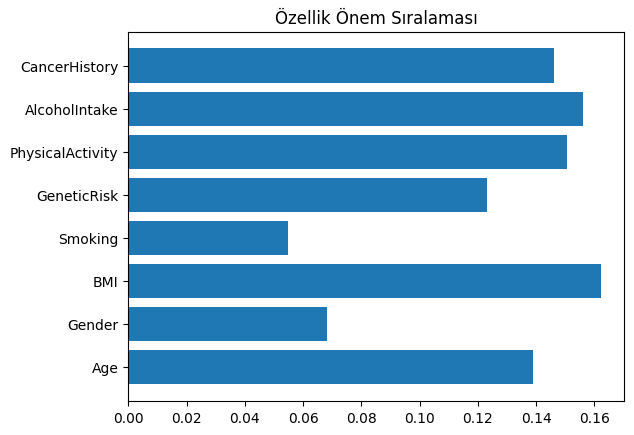

In [20]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.title("Özellik Önem Sıralaması")
plt.show()

In [21]:

df["Diagnosis"].value_counts()

Diagnosis
0    943
1    557
Name: count, dtype: int64

In [ ]:
import joblib

joblib.dump(model, "cancer.pkl")

['lung_cancer_model.pkl']

In [23]:
import joblib

model = joblib.load("cancer.pkl")

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [25]:
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']  # sınıf dengesizliği için
}

In [28]:
rf = RandomForestClassifier(random_state=42)

In [29]:

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall',       # kanser sınıfı recall'unu artırmak için
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [30]:

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='recall', verbose=1)

In [31]:
print(grid_search.best_params_)

{'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [32]:
best_model = grid_search.best_estimator_

In [69]:
importances = best_model.feature_importances_
features = X.columns

In [70]:
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

In [71]:
print(feature_importance_df)

            Feature  Importance
7     CancerHistory    0.227015
4       GeneticRisk    0.163558
2               BMI    0.130427
0               Age    0.120965
6     AlcoholIntake    0.118883
1            Gender    0.114476
5  PhysicalActivity    0.074759
3           Smoking    0.049917


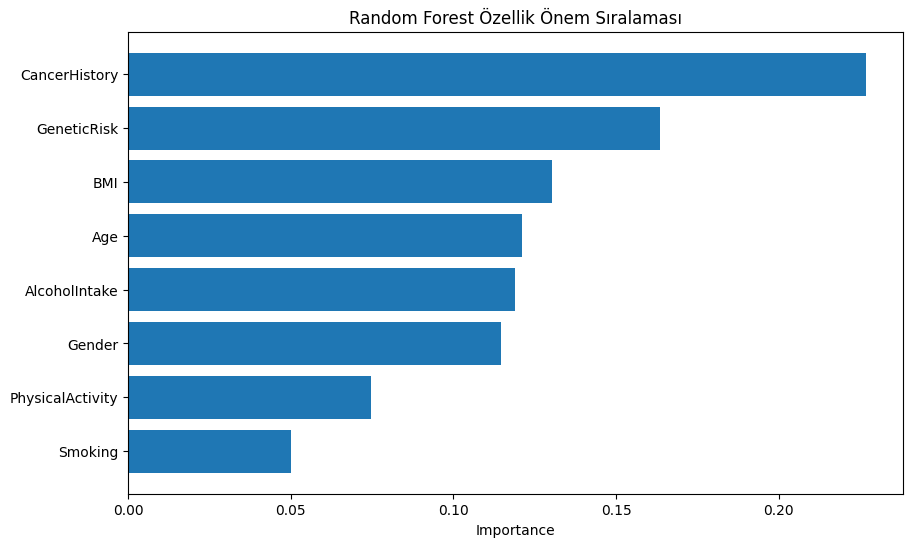

In [72]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.gca().invert_yaxis()  # En önemli özellik yukarıda gözüksün
plt.title("Random Forest Özellik Önem Sıralaması")
plt.xlabel("Importance")
plt.show()